# Loading Dataset

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Data Science lab/Breast Cancer/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [33]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis',axis=1)
y=df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [35]:

# training the model on training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = DecisionTreeClassifier(criterion='entropy')
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

print(clf_model.score(X_train, y_train))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
0.9078947368421053
              precision    recall  f1-score   support

           B       0.92      0.95      0.93       148
           M       0.89      0.84      0.86        80

    accuracy                           0.91       228
   macro avg       0.90      0.89      0.90       228
weighted avg       0.91      0.91      0.91       228



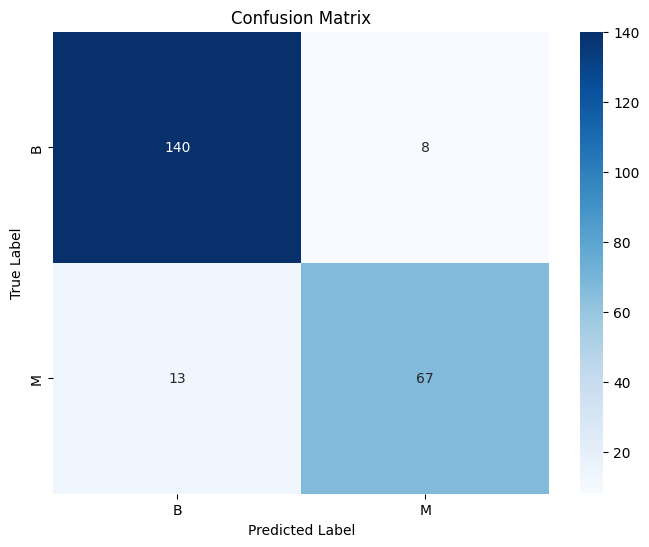

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B','M'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B','M'], yticklabels=['B','M'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

[Text(0.4230769230769231, 0.9166666666666666, 'x[22] <= 104.1\nentropy = 0.963\nsamples = 341\nvalue = [209, 132]'),
 Text(0.15384615384615385, 0.75, 'x[13] <= 34.405\nentropy = 0.083\nsamples = 194\nvalue = [192, 2]'),
 Text(0.28846153846153844, 0.8333333333333333, 'True  '),
 Text(0.07692307692307693, 0.5833333333333334, 'entropy = 0.0\nsamples = 180\nvalue = [180, 0]'),
 Text(0.23076923076923078, 0.5833333333333334, 'x[18] <= 0.02\nentropy = 0.592\nsamples = 14\nvalue = [12, 2]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 535.8\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.4166666666666667, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6923076923076923, 0.75, 'x[6] <= 0.086\nentropy = 0.517\nsamples = 147\nvalue = [17, 130]'),
 Text(0.5576923076923077, 0.8333333333333333

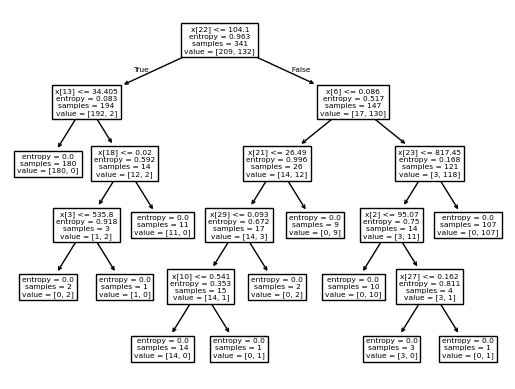

In [37]:
from sklearn import tree
tree.plot_tree(clf_model)